# FCC-page-view-time-series


<pre>
Assignment
For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

1] Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
2] Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
3] Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
4] Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
5] Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.
</pre>

In [3]:
import matplotlib as plt
import seaborn as sns
import pandas as pd

In [4]:
df=pd.read_csv("fcc-forum-pageviews.csv", index_col="date")

In [5]:
df

,value
date,
5/9/2016,1201
5/10/2016,2329
5/11/2016,1716
5/12/2016,10539
5/13/2016,6933
...,...
11/29/2019,171584
11/30/2019,141161
12/1/2019,142918


In [6]:
df=df.drop(df[(df['value']<df['value'].quantile(0.025)) | (df['value']>df['value'].quantile(0.975))].index)

In [7]:
df

,value
date,
5/19/2016,19736
5/26/2016,18060
5/27/2016,19997
5/28/2016,19044
5/29/2016,20325
...,...
11/24/2019,138875
11/29/2019,171584
11/30/2019,141161


Text(0, 0.5, 'Page Views')

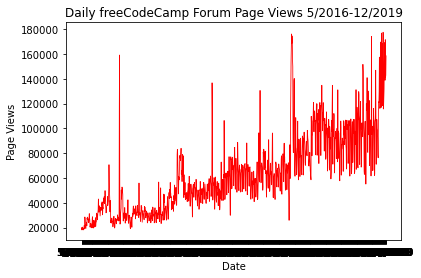

In [8]:
import matplotlib.pyplot as plt
plt.plot(df['value'],color='red',linewidth=0.8)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

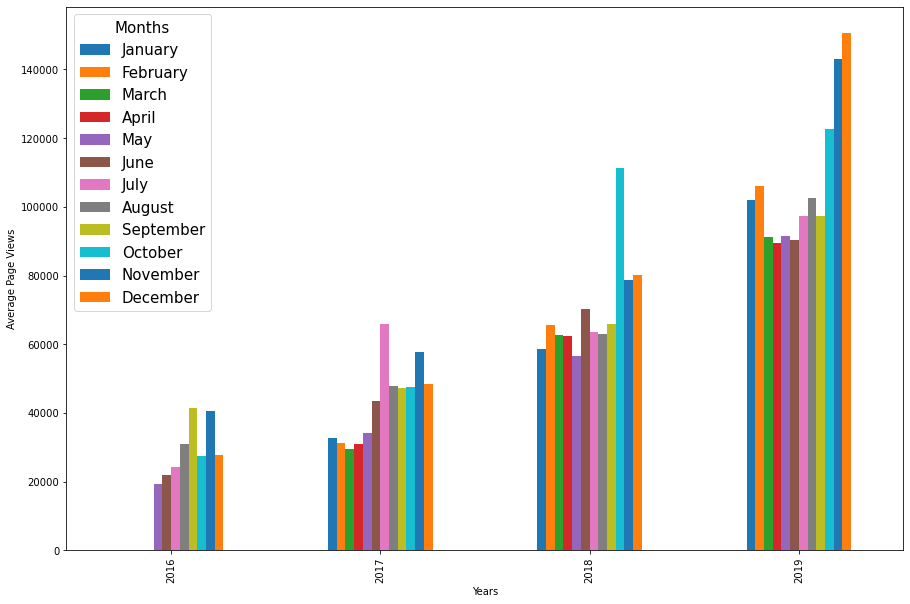

In [12]:
df_bar = df.copy()
df_bar['Year'] = pd.DatetimeIndex(df_bar.index).year
df_bar['Month'] = pd.DatetimeIndex(df_bar.index).month

df_bar = df_bar.groupby(['Year', 'Month'])['value'].mean()
df_bar = df_bar.unstack()
month_names=['January', 'February', 'March', 'April', 'May', 'June', 'July', 
             'August', 'September', 'October', 'November', 'December']
# Draw bar plot
fig = df_bar.plot(kind= 'bar', figsize = (15,10)).figure

plt.title('')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
lg = plt.legend(title= 'Months', fontsize = 15, labels = month_names)
title = lg.get_title()
title.set_fontsize(15)

Text(0, 0.5, 'Page Views')

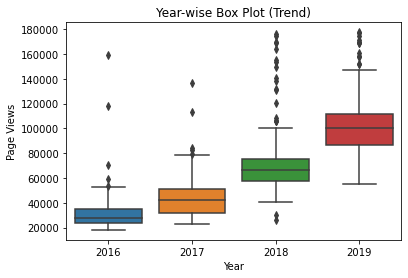

In [13]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['Year'] = pd.DatetimeIndex(df_box["date"]).year
df_box['Month'] = pd.DatetimeIndex(df_box["date"]).month
plt1 =sns.boxplot(x = "Year", y = "value", data = df_box)
plt1.set_title("Year-wise Box Plot (Trend)")
plt1.set_xlabel('Year')
plt1.set_ylabel('Page Views')

Text(0, 0.5, 'Page Views')

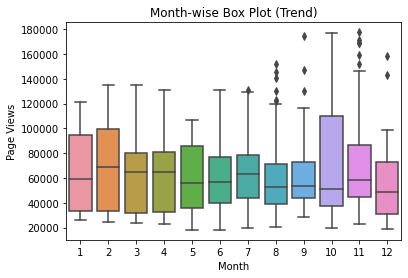

In [11]:
plt2=sns.boxplot(x='Month',y='value',data=df_box)
plt2.set_title("Month-wise Box Plot (Trend)")
plt2.set_xlabel('Month')
plt2.set_ylabel('Page Views')